In [1]:
from integrate_it.integrate import *
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Задание региона

Вводите точки в формате "x y" (минимум 3). Для окончания ввода введите пустую строку. В качестве альтернативы можно задать координатыы вершин в коде.

In [2]:
verts = [[-17,13], [-12,15],[-8,15],[-2,14],[4,15],[8,15],[13,13],[-2,10]]
if len(verts) == 0:
    inp = ""
    while True:
        inp = input()
        try:
            verts.append(list(map(float, inp.split())))
            if len(verts[-1]) != 2:
                verts.pop(-1)
            else:
                continue
        except Exception:
            pass
        if inp == "" and len(verts) >=3:
                break
        print("Неверный формат ввода!")
verts = np.array(verts,dtype=float)

Установите значение флага <b>square</b> на True если область является прямоугольником со сторонами, параллельными осям координат. Это в разы ускорит процесс интегрирования (не потребуется переопределять функцию на сетке), а также повлияет на расчет погрешности (более точно).

In [3]:
square = False

Визуализируем регион

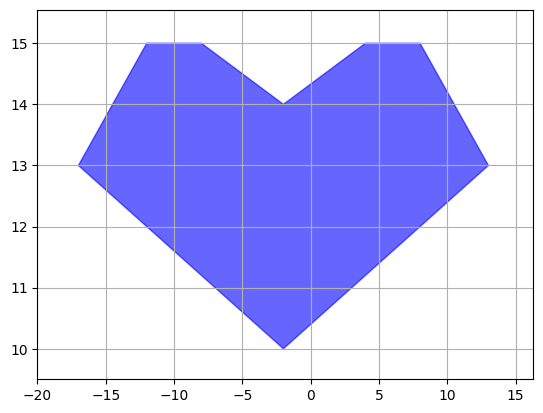

In [5]:
rg = Region(verts,is_square=square)
rg.visualize()

# Задание Функции

In [6]:
func = lambda x, y: x**2 / y # Функция
func_der_x = lambda x, y: 2*x/y # Частная производная по х
func_der_y = lambda x, y: -x**2 / (y**2) # Частная производная по у
func_der_xy = lambda x, y: -2*x / (y**2) # Частная производная второго порядка

# Интегрирование

## Демонстрация работы

Установим количество промежутков разбиения по осям. Примем $N_x = N_y = N$.

In [7]:
N = 4000
N_x, N_y = [N]*2 

In [8]:
part = Partition(func,rg,"grid",N_x,N_y) # Создадим объект разбиения
info = { # Словарь с информацией, необходимой для оценки погрешностей
    "n_x":N_x,
    "n_y":N_y,
    "diff_x": rg.get_max_x() - rg.get_min_x(),
    "diff_y": rg.get_max_y() - rg.get_min_y(),
    "max_func": 17**2 / 10,
    "max_dfunc_dx": 2*17/10,
    "max_dfunc_dy": (17/10)**2,
    "max_dfunc_dx_dy": 2*17/100,
    "is_square": square
}
integ = Integrator_Riemann(func) # Объект интегратора

Получим результат интегрирования с оценкой ошибки

In [9]:
integ_output = integ.generate_riemann_sum(part,info)
integ_output

{'riemann_sum': 358.12319127596766,
 'fineness': 5.7812499999999996e-05,
 'error': 2.1675}

In [10]:
real_integ = 358.153

In [11]:
print(f"Результат численного интегрирования: {integ_output['riemann_sum']}\n" + 
      f"Реальное значение: {real_integ}\n" +
      f"Ошибка: {abs(real_integ - integ_output['riemann_sum'])}\n" +
      f"Теоретическая ошибка: {integ_output['error']}\n"+
      f"Мелкость разбиения: {integ_output['fineness']}")

Результат численного интегрирования: 358.12319127596766
Реальное значение: 358.153
Ошибка: 0.029808724032363898
Теоретическая ошибка: 2.1675
Мелкость разбиения: 5.7812499999999996e-05


## Исследование зависимости погрешности от мелкости разбиения

In [12]:
real_integ = 1/3 * np.log(1.5)*(13**3 + 17**3)

In [13]:
verts = [[-17, 10], [-17, 15], [13, 15], [13, 10]]
verts = np.array(verts,dtype=float)
square = True

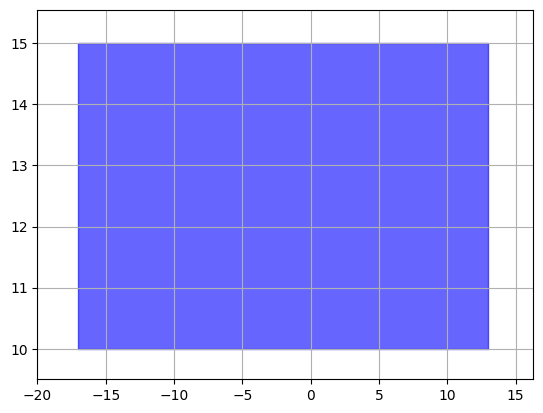

In [14]:
rg = Region(verts,is_square=square)
rg.visualize()

In [15]:
Ns = np.linspace(100, 10000,40,dtype=int)

In [16]:
fin = []
err_th = []
err_real = []
for n in Ns:
    N_x, N_y = [n]*2 
    part = Partition(func,rg,"grid",N_x,N_y) 
    info = { 
        "n_x":N_x,
        "n_y":N_y,
        "diff_x": rg.get_max_x() - rg.get_min_x(),
        "diff_y": rg.get_max_y() - rg.get_min_y(),
        "max_func": 17**2 / 10,
        "max_dfunc_dx": 2*17/10,
        "max_dfunc_dy": (17/10)**2,
        "max_dfunc_dx_dy": 2*17/100,
        "is_square": square
    }
    integ = Integrator_Riemann(func)
    integ_output = integ.generate_riemann_sum(part,info)
    fin.append(integ_output["fineness"])
    err_real.append(abs(real_integ-integ_output["riemann_sum"]))
    err_th.append(integ_output["error"])

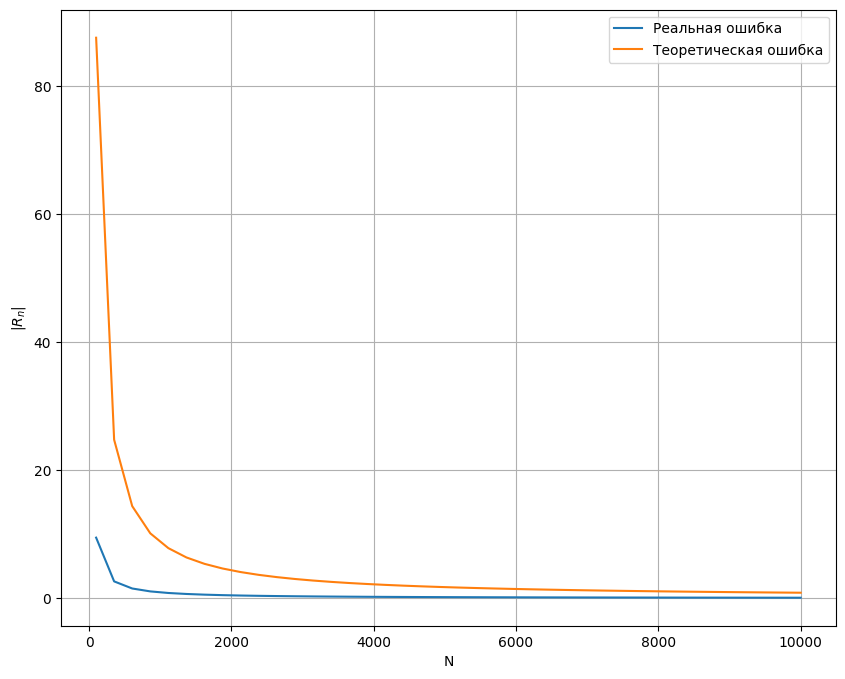

In [17]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(Ns,err_real,label="Реальная ошибка")
plt.plot(Ns,err_th,label="Теоретическая ошибка")
plt.xlabel("N")
plt.ylabel(r"$|R_n$|")
plt.legend()
plt.grid(True)

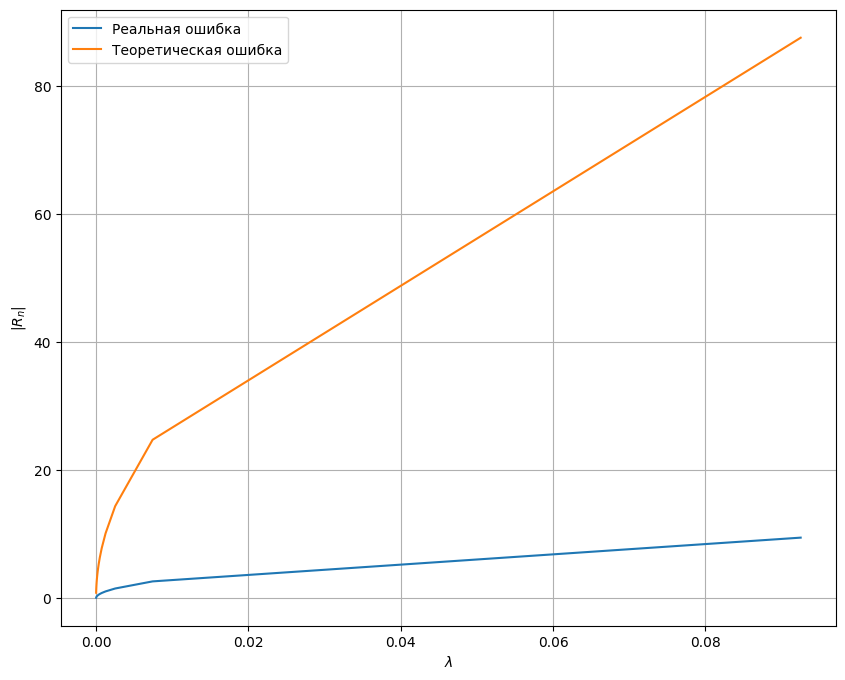

In [18]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(fin,err_real,label="Реальная ошибка")
plt.plot(fin,err_th,label="Теоретическая ошибка")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$|R_n$|")
plt.legend()
plt.grid(True)